In [1]:
from all_libraries import *
from inputdata import *
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')




In [2]:
def alpha_reliability(data):
    """Cronbach's alpha reliability measure."""
    alpha_value= pg.cronbach_alpha(data)
    print('Alpha reliability is: ', alpha_value)
    
    
    

In [3]:
def NormalityAssumption(dataset):
    '''
    Evaluates data sample and quantifies if data was drawn from a Gaussian distribution
    Test: Samuel Shapiro and Martin Wilk.

    '''
    for i in dataset.columns:
        stat, p = stats.shapiro(dataset[[(i)]])
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        alpha = 0.05
        if p > alpha:
            print('Column: {} - Gaussian Distribution (fail to reject H0)'.format(i))
        else:
            print('Column: {} - Not Gaussian Distribution (Reject H0)'.format(i))
            


In [4]:
def boxplots(techniques):
    """ creates boxplot visualizations  """
    col_list = []

    for col in techniques.columns:
        df = pd.DataFrame({'Score': techniques[col]})
        df['Technique'] = col
        col_list.append(df)
        stacked = pd.concat(col_list, axis=0)
    
    g = sns.boxplot(x="Technique", y="Score", data=stacked)
    g.set_title('Boxplot Distribution by Persuasion Technique  ', fontsize=20)
    g.set_ylabel('Scores', fontsize=20)
    g.set_xlabel('Persuasion Techniques', fontsize=20)
    g.tick_params(labelsize=14)

In [5]:
def correlation(dataset):
    '''Visualization Correlation Matrix'''
    corr = dataset.corr()
    colormap =sns.palplot(sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, center="dark"))

    plt.figure(figsize = (25,12))
    sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30,
            cmap = colormap, linecolor='white')
    plt.title('Correlation matrix variables in dataset', y = 1.05, size=15) 

## Reading Dataset

In [6]:
def read_data():
    data = EDAworkflow()
    personality_tipi = data.get_personality(data)
    belief_das = data.get_belief_system(data)
    techniques = data.get_techniques(data)
    demo = data.get_demographics(data)

    ## Subset summarized TIPI and DAS scores

    das = belief_das[['approval', 'love', 'achievement', 'perfectionism','entitlement', 'omnipotence', 'autonomy']]
    tipi = personality_tipi[['Extroversion', 'Agreeableness','Conscientiousness', 'Emotional stability', 'Openness']]

    df = pd.concat([demo,tipi,das,techniques],axis=1).astype(int)
    return df

In [7]:
df = read_data()

Total participants in survey: 1995
Total survey items: 78
--------
TIPI survey section- shape: (1995, 15)
--------
DAS survey section- shape: (1995, 42)
--------
Techniques survey section- shape: (1995, 30)


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1995.0,2.019048,1.852548,0.0,0.0,1.0,4.0,5.0
gender,1995.0,1.002506,0.972796,0.0,0.0,1.0,2.0,2.0
education,1995.0,2.945865,2.112455,0.0,1.0,3.0,5.0,6.0
Extroversion,1995.0,3.297744,1.543930,1.0,2.0,3.0,4.0,7.0
Agreeableness,1995.0,2.909273,1.193971,1.0,2.0,3.0,4.0,7.0
Conscientiousness,1995.0,5.113283,1.389240,1.0,4.0,5.0,6.0,7.0
Emotional stability,1995.0,3.367920,1.556999,1.0,2.0,3.0,4.0,7.0
Openness,1995.0,5.099248,1.281053,1.0,4.0,5.0,6.0,7.0
approval,1995.0,1.342356,3.657282,-10.0,-1.0,2.0,4.0,10.0
love,1995.0,2.577444,4.632686,-10.0,-1.0,3.0,6.0,10.0


In [41]:
df.shape

(1995, 45)

In [44]:
NormalityAssumption(dataset=df)

Statistics=0.743, p=0.000
Column: age - Not Gaussian Distribution (Reject H0)
Statistics=0.670, p=0.000
Column: gender - Not Gaussian Distribution (Reject H0)
Statistics=0.827, p=0.000
Column: education - Not Gaussian Distribution (Reject H0)
Statistics=0.938, p=0.000
Column: Extroversion - Not Gaussian Distribution (Reject H0)
Statistics=0.922, p=0.000
Column: Agreeableness - Not Gaussian Distribution (Reject H0)
Statistics=0.911, p=0.000
Column: Conscientiousness - Not Gaussian Distribution (Reject H0)
Statistics=0.939, p=0.000
Column: Emotional stability - Not Gaussian Distribution (Reject H0)
Statistics=0.921, p=0.000
Column: Openness - Not Gaussian Distribution (Reject H0)
Statistics=0.982, p=0.000
Column: approval - Not Gaussian Distribution (Reject H0)
Statistics=0.974, p=0.000
Column: love - Not Gaussian Distribution (Reject H0)
Statistics=0.983, p=0.000
Column: achievement - Not Gaussian Distribution (Reject H0)
Statistics=0.989, p=0.000
Column: perfectionism - Not Gaussian Di

## Display Distributions

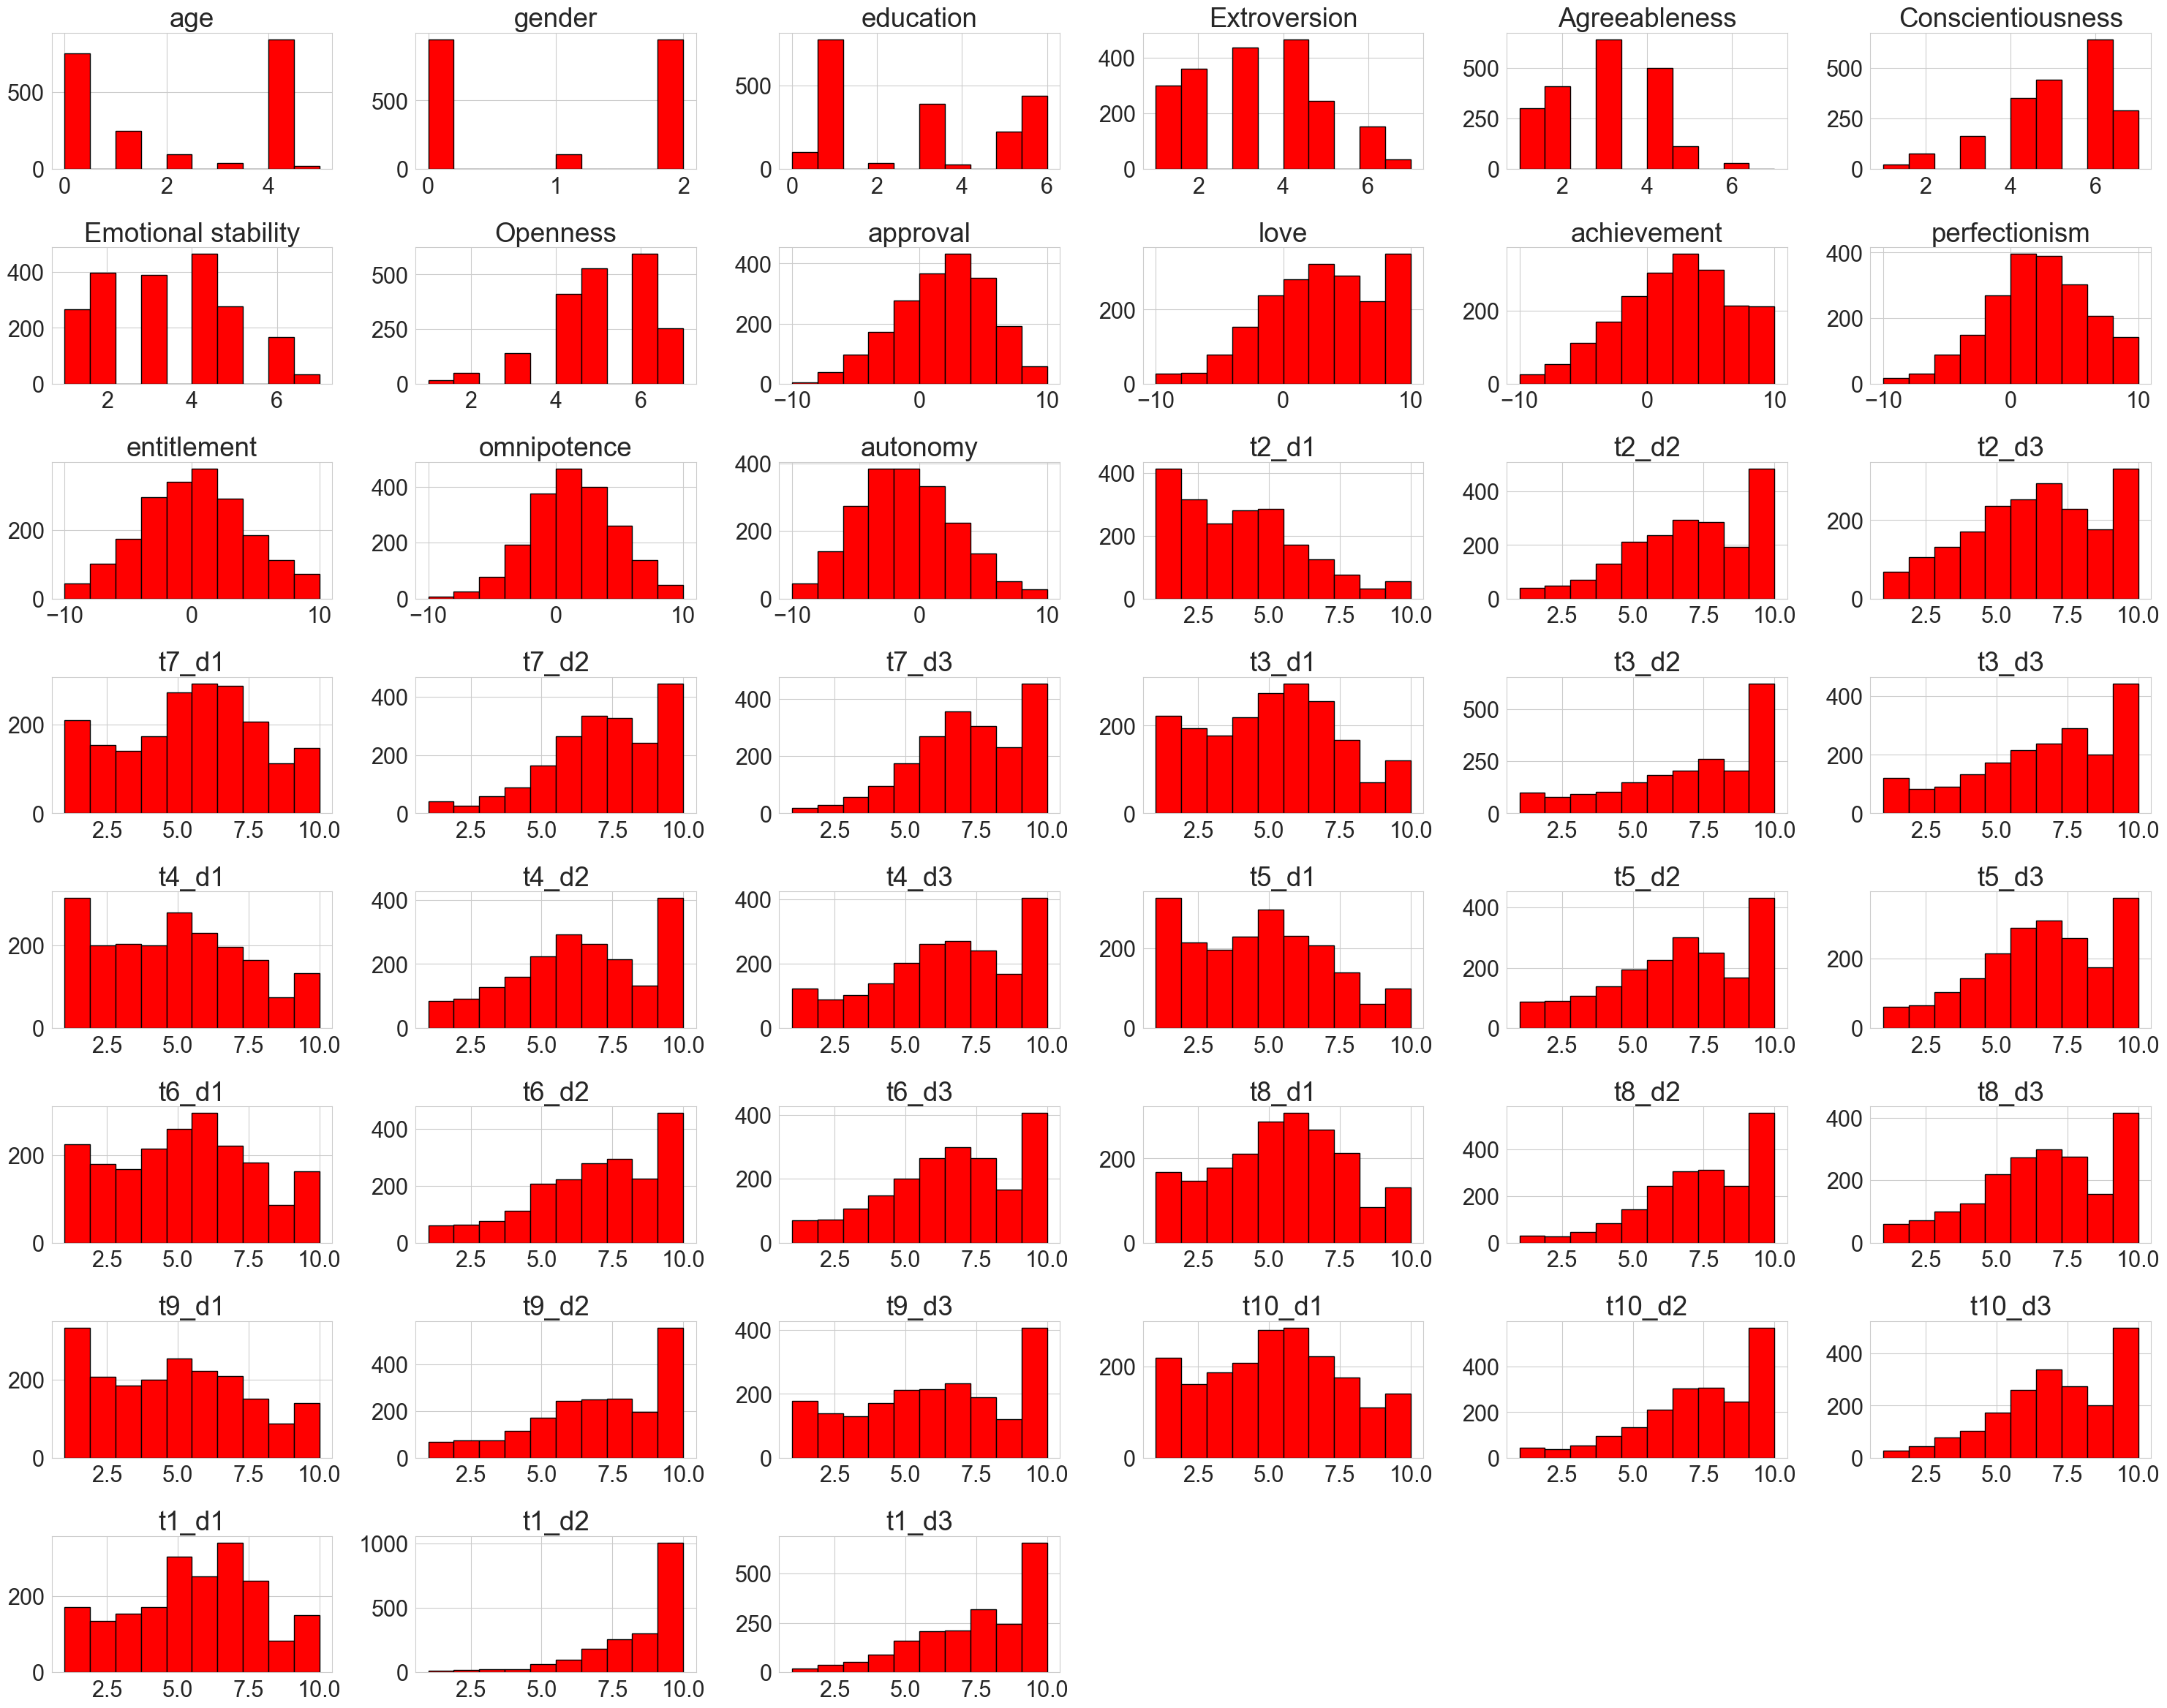

In [88]:
df.hist(color='red',edgecolor = 'black',figsize=(30, 44), layout=(15, 6))
#plt.suptitle("Histograms Plots", fontsize=30)
plt.tight_layout()

## ALPHA RELIABILITY (TIPI) and DAS

In [58]:
# A NOTE ON ALPHA RELIABILITY AND FACTOR STRUCTURE IN THE TIPI: 
# It is almost impossible to get high alphas and good fit indices in instruments like the TIPI, which are designed to measure very broad domains with only two items per dimension and using items at both the positive and negative poles. For this reason some researchers have pointed out that alphas are misleading when calculated on scales with small numbers of items (Kline, 2000; Wood & Hampson, 2005).
print('TIPI:')
alpha_reliability(data=tipi)
print('-----------------')
print('DAS:')
alpha_reliability(data=das)

TIPI:
Alpha reliability is:  (-0.19079718101045973, array([-0.275, -0.11 ]))
-----------------
DAS:
Alpha reliability is:  (0.7870077679234445, array([0.772, 0.801]))


## Techniques statistics

In [63]:

print(tabulate(techniques.describe().T, headers='keys', tablefmt='psql'))


+--------+---------+---------+---------+-------+-------+-------+-------+-------+
|        |   count |    mean |     std |   min |   25% |   50% |   75% |   max |
|--------+---------+---------+---------+-------+-------+-------+-------+-------|
| t2_d1  |    1995 | 3.84311 | 2.38138 |     1 |   2   |     4 |   5   |    10 |
| t2_d2  |    1995 | 7.15789 | 2.39119 |     1 |   5.5 |     7 |   9   |    10 |
| t2_d3  |    1995 | 6.43358 | 2.57563 |     1 |   5   |     7 |   9   |    10 |
| t7_d1  |    1995 | 5.45664 | 2.6335  |     1 |   3   |     6 |   7   |    10 |
| t7_d2  |    1995 | 7.33584 | 2.23146 |     1 |   6   |     8 |   9   |    10 |
| t7_d3  |    1995 | 7.36892 | 2.14757 |     1 |   6   |     7 |   9   |    10 |
| t3_d1  |    1995 | 5.07519 | 2.56947 |     1 |   3   |     5 |   7   |    10 |
| t3_d2  |    1995 | 7.19499 | 2.7685  |     1 |   5   |     8 |  10   |    10 |
| t3_d3  |    1995 | 6.77343 | 2.7458  |     1 |   5   |     7 |   9   |    10 |
| t4_d1  |    1995 | 4.80952

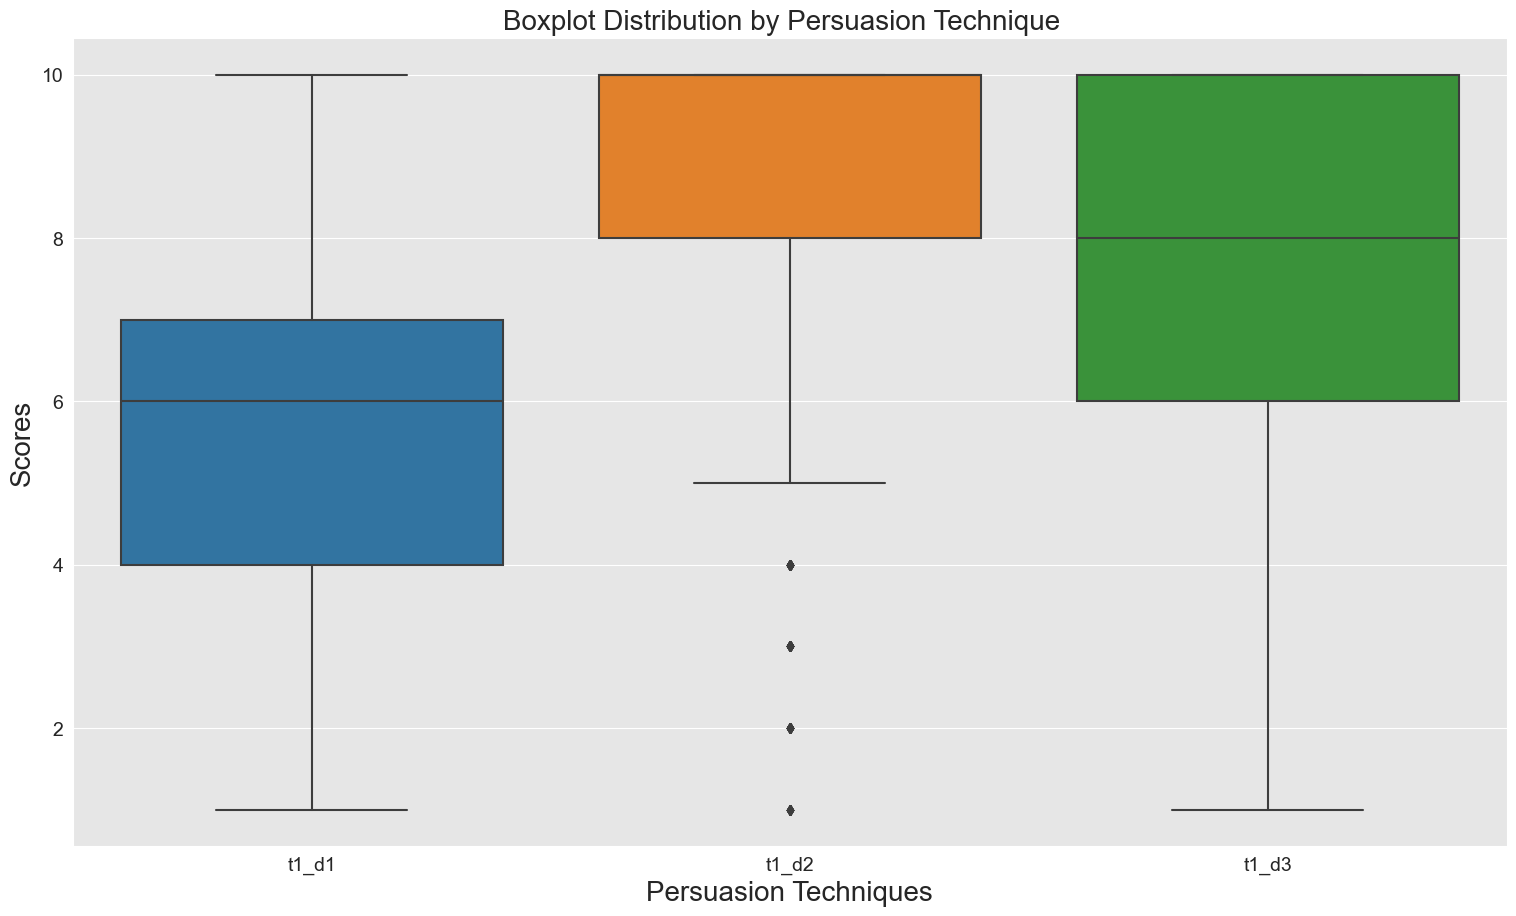

In [66]:
boxplots(techniques[['t1_d1','t1_d2','t1_d3']])

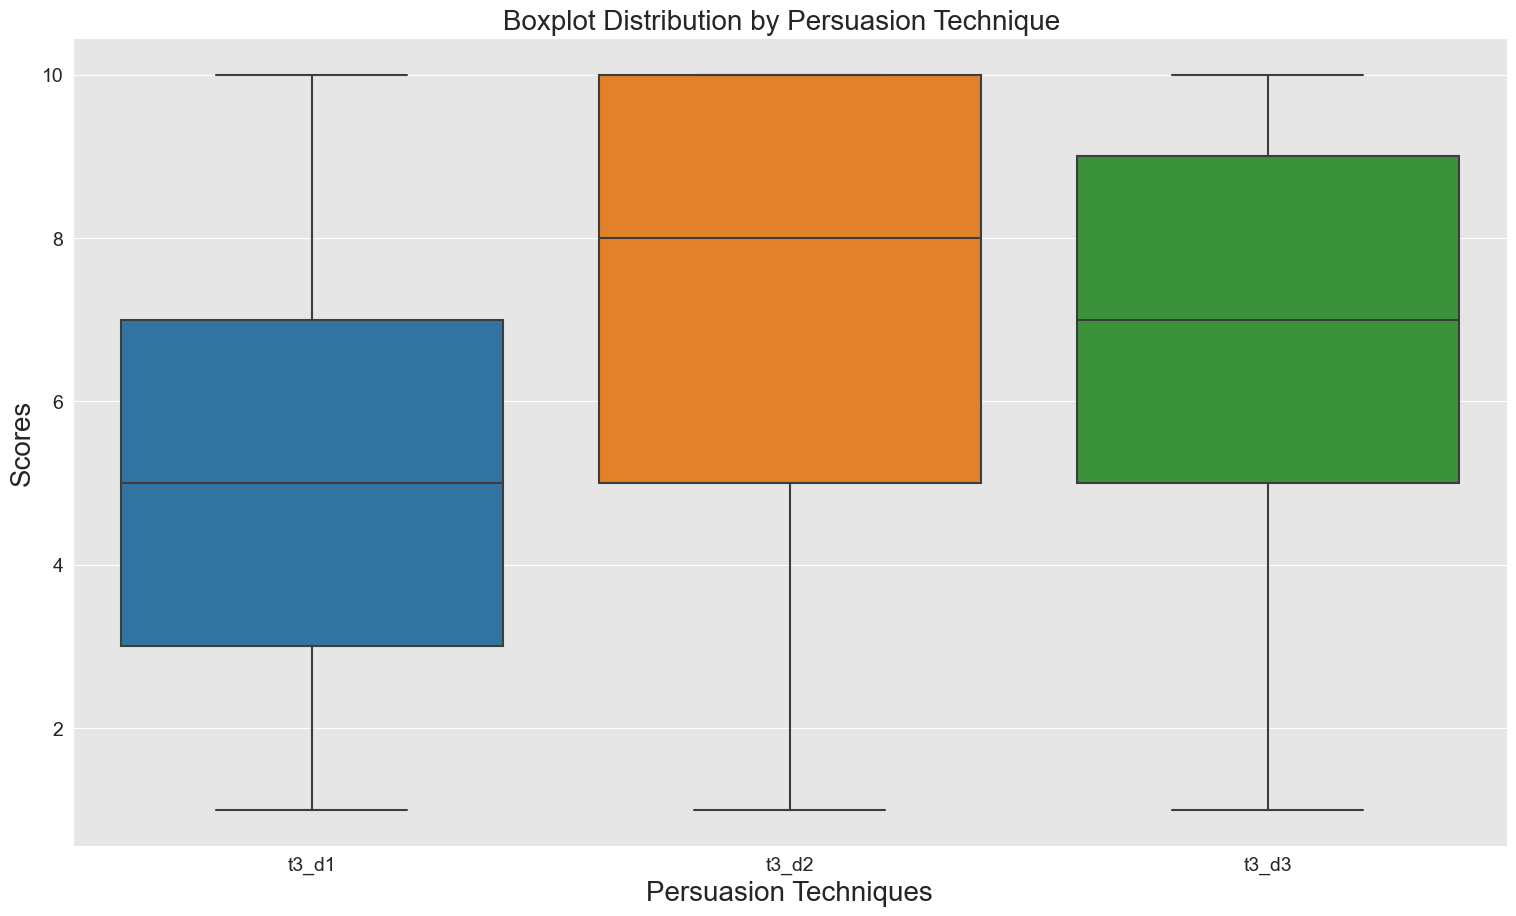

In [68]:
boxplots(techniques[['t3_d1','t3_d2','t3_d3']])

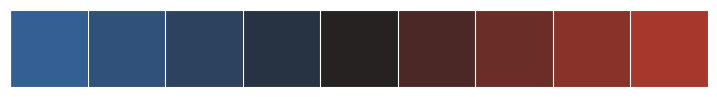

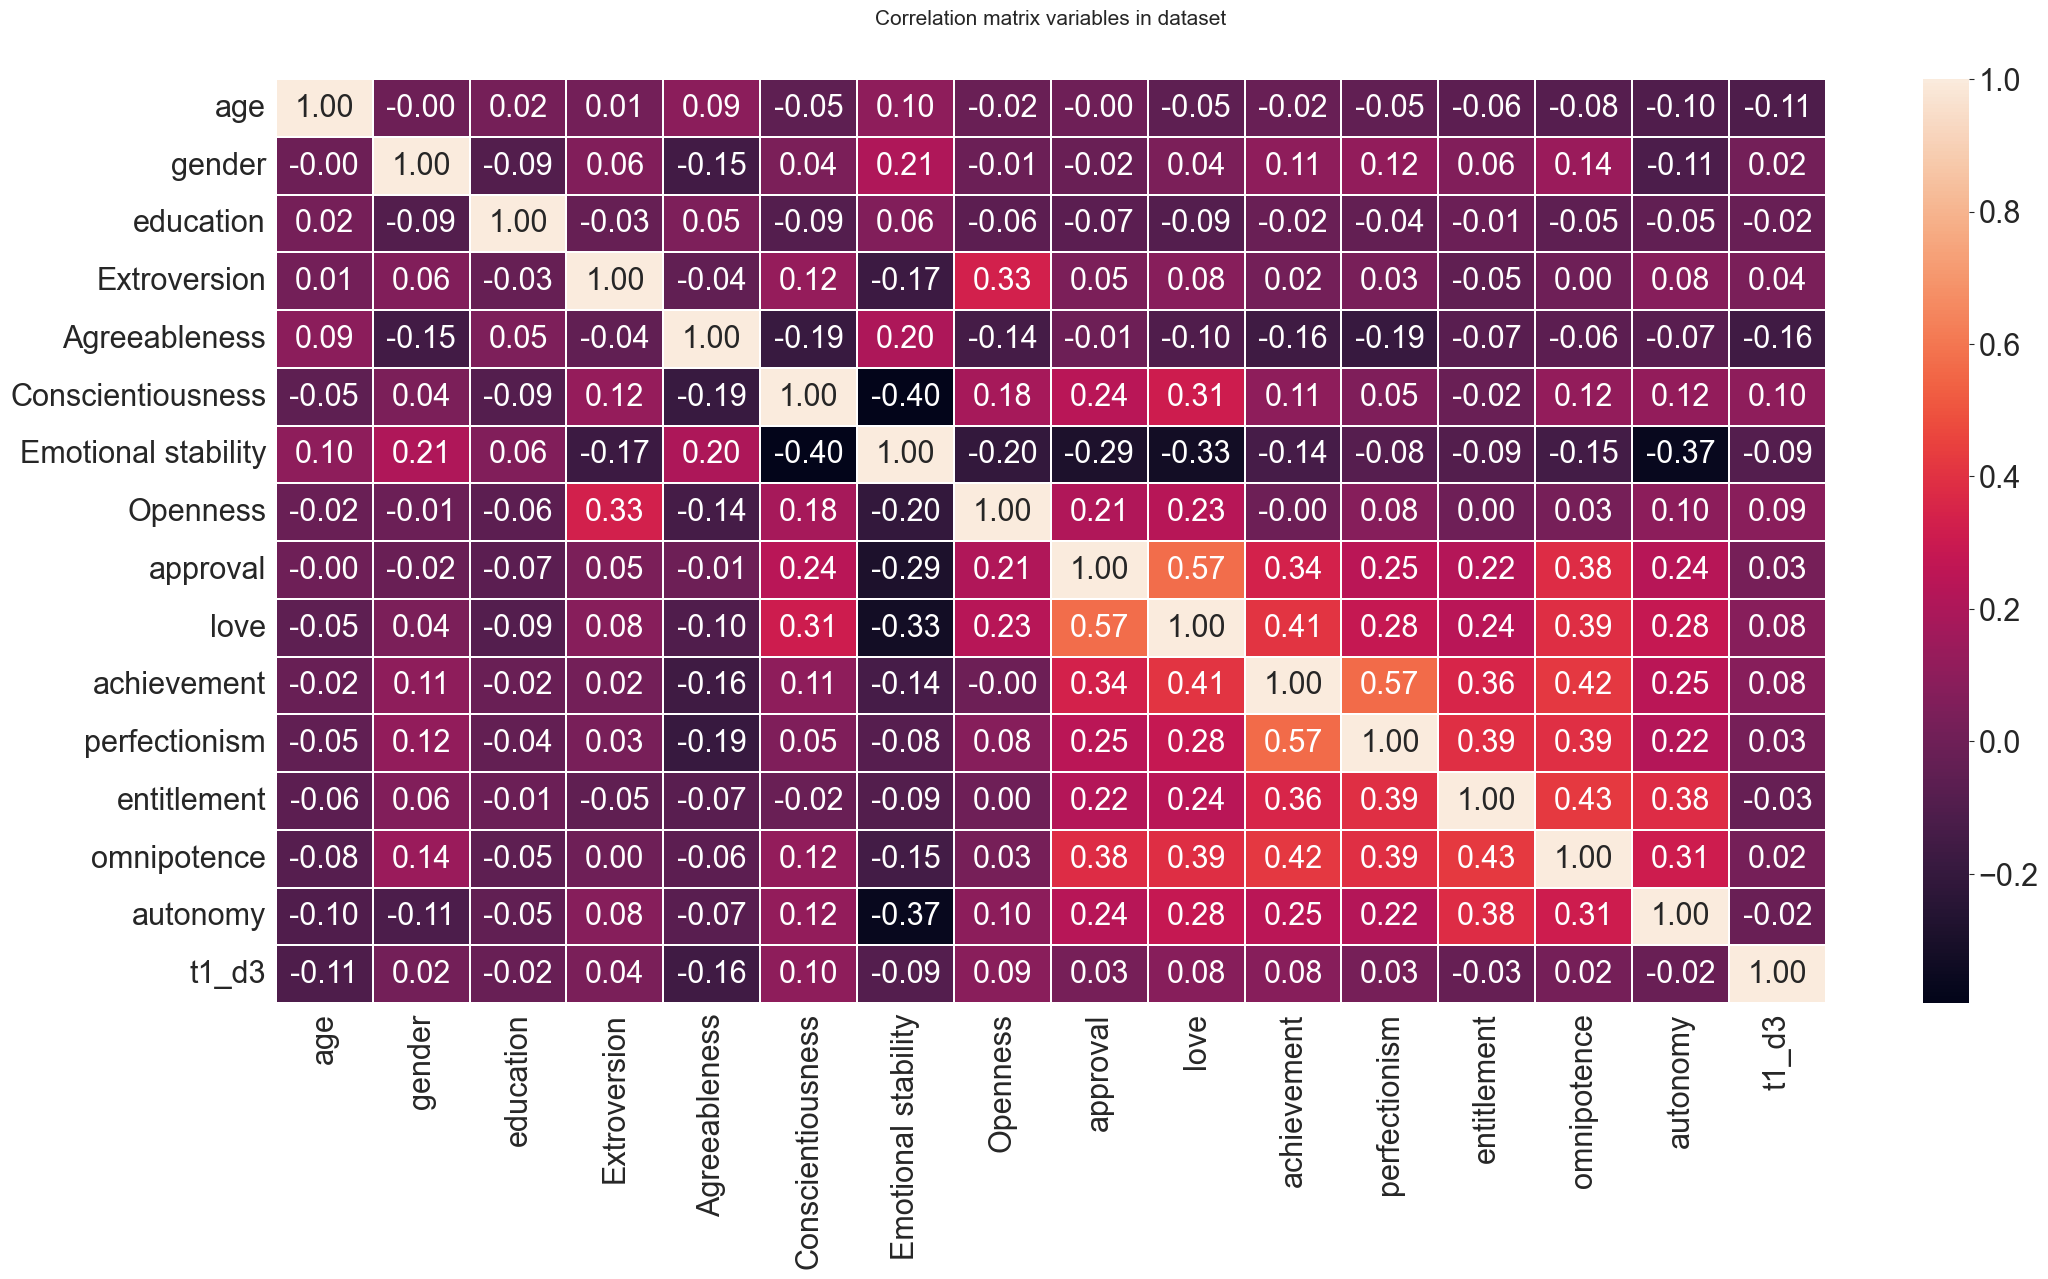

In [77]:
correlation(df[['age', 'gender', 'education', 'Extroversion', 'Agreeableness',
               'Conscientiousness', 'Emotional stability', 'Openness', 'approval',
               'love', 'achievement', 'perfectionism', 'entitlement', 'omnipotence', 'autonomy', 
                't1_d3']])

In [74]:
df.columns

Index(['age', 'gender', 'education', 'Extroversion', 'Agreeableness',
       'Conscientiousness', 'Emotional stability', 'Openness', 'approval',
       'love', 'achievement', 'perfectionism', 'entitlement', 'omnipotence',
       'autonomy', 't2_d1', 't2_d2', 't2_d3', 't7_d1', 't7_d2', 't7_d3',
       't3_d1', 't3_d2', 't3_d3', 't4_d1', 't4_d2', 't4_d3', 't5_d1', 't5_d2',
       't5_d3', 't6_d1', 't6_d2', 't6_d3', 't8_d1', 't8_d2', 't8_d3', 't9_d1',
       't9_d2', 't9_d3', 't10_d1', 't10_d2', 't10_d3', 't1_d1', 't1_d2',
       't1_d3'],
      dtype='object')

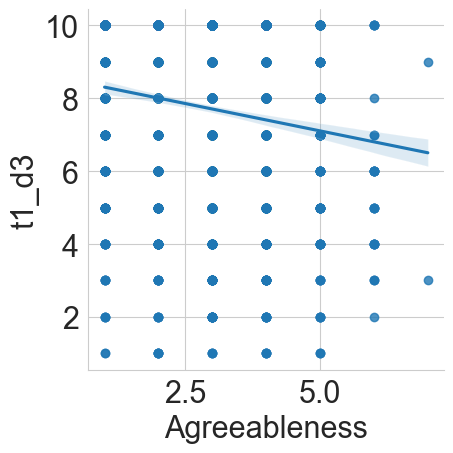

In [87]:
sns.set_style('whitegrid')
sns.lmplot(x ='Agreeableness', y ='t1_d3', data = df)
